In [55]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from math import sqrt
import statsmodels.api as sm
sns.set(style='ticks', color_codes=True)



In [2]:
#blackFridayData = os.path.join('C:'+ os.sep,'Users' + 'Kwaz9' + 'Desktop' + 'MachineLearning' + 'dataScienceFromScratch' + 'blackFriday' + 'test.csv')

testdf = pd.read_csv(r'test.csv')

traindf = pd.read_csv(r'train.csv')

traindf.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [3]:
traindf.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [4]:
#your objective is to make several plots of purchase amount verses the varios products
#linear regression here!

#use roote measn squared analysis (RMSE)


#ax3_pairs = sns.pairplot()



In [1]:
traindf.columns
#look for missing data
traindf.isna().any()



NameError: name 'traindf' is not defined

In [6]:
#replace NA values with zeros

traindf = traindf.fillna(0)

In [7]:
traindf.isna().any()
#no more missing values

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2            False
Product_Category_3            False
Purchase                      False
dtype: bool

In [8]:
#checking unique values for each column
traindf.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

In [9]:
#How many whats the male to female ration?
traindf['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [10]:
traindf['Gender'].value_counts(normalize=True)

M    0.753105
F    0.246895
Name: Gender, dtype: float64

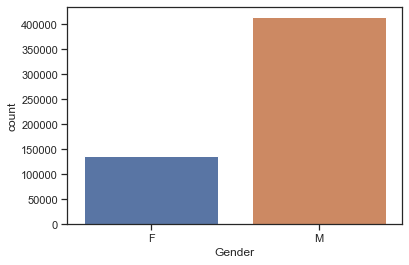

In [11]:
#visualize gender distrobution

sns.countplot(traindf['Gender'])

In [12]:
#examine age distrobution
traindf['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [13]:
#display number of individuals in each age range
traindf['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

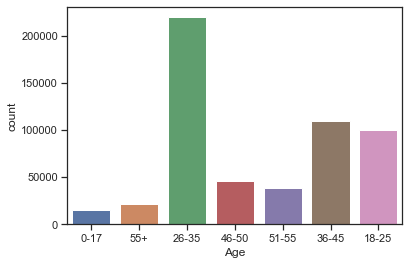

In [14]:
#visualize num individuals in each age range in a histogram (seaborn countplot)
sns.countplot(traindf['Age'])

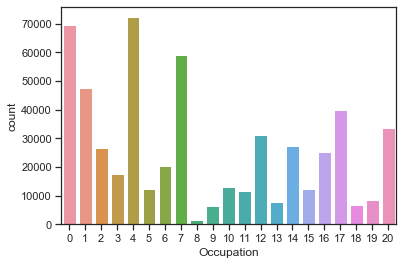

In [15]:
#evaluate job distribution
sns.countplot(traindf['Occupation'])

In [16]:
#maritial status distribution
traindf['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

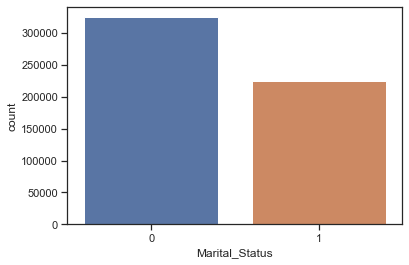

In [17]:
#visualize marital status
sns.countplot(traindf["Marital_Status"])

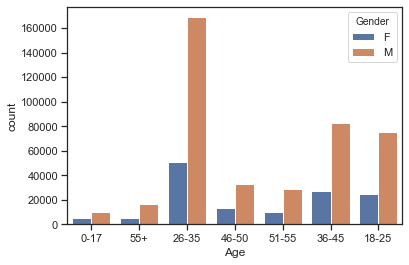

In [18]:
#What is the age and gender relationship??
sns.countplot(traindf['Age'], hue=traindf['Gender'])


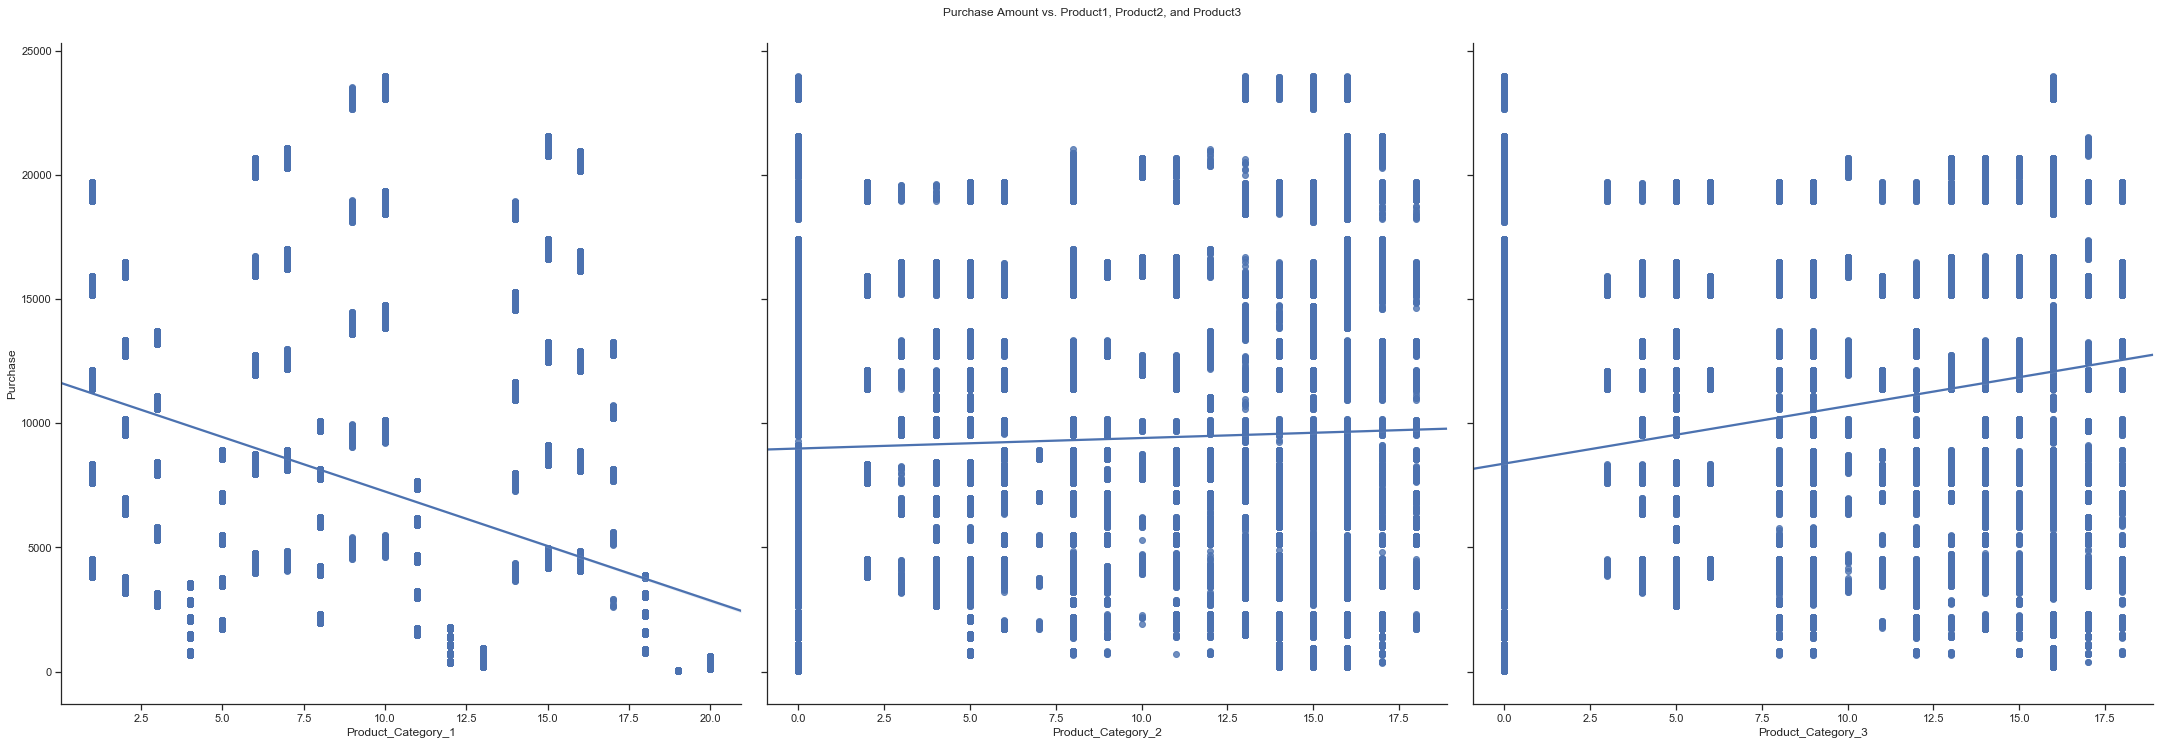

In [19]:
# will use pairsplit for visualizing the realtionships between our selected predictors and the resons

ax_3pairs = sns.pairplot(traindf, x_vars=['Product_Category_1', 'Product_Category_2', 'Product_Category_3'], y_vars='Purchase', height=10, aspect=1.0, kind='reg')

ax_3pairs.fig.suptitle('Purchase Amount vs. Product1, Product2, and Product3', y=1.03)
plt.show()


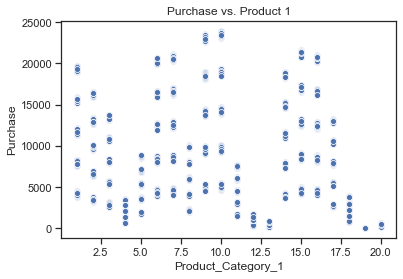

In [20]:
#make some scatter plots for linear regression

p1_scatter = sns.scatterplot(traindf['Product_Category_1'], traindf['Purchase'])
p1_scatter.set_title('Purchase vs. Product 1')

plt.show()

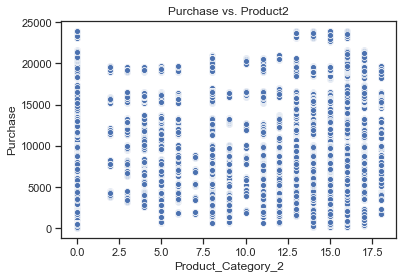

In [21]:
p2_scatter = sns.scatterplot(traindf['Product_Category_2'], traindf['Purchase'])
p2_scatter.set_title('Purchase vs. Product2')
plt.show()

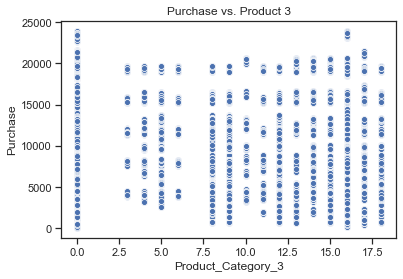

In [22]:
p3_scatter = sns.scatterplot(traindf['Product_Category_3'], traindf['Purchase'])
p3_scatter.set_title('Purchase vs. Product 3')
plt.show()

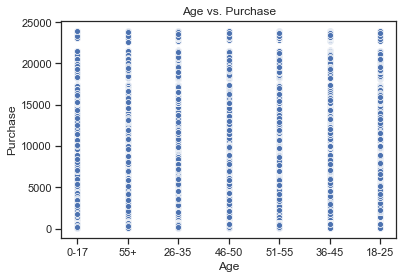

In [23]:
#make linear regression model using scipy
age_scatter = sns.scatterplot(traindf['Age'], traindf['Purchase'])
age_scatter.set_title('Age vs. Purchase')
plt.show()

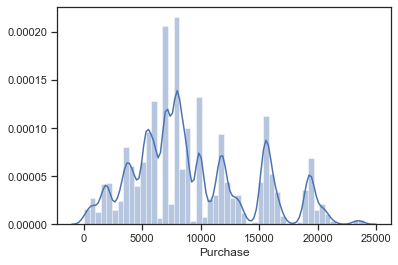

In [24]:
#Purchase distribution
purchase_hist = sns.distplot(traindf['Purchase'])
plt.show()


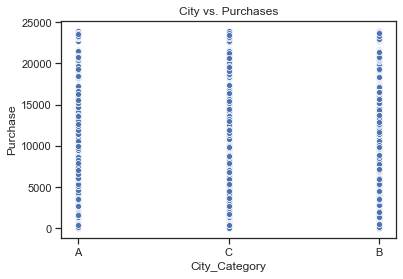

In [25]:
#City versus purchases chart
city_purchase_scatter = sns.scatterplot(traindf['City_Category'], traindf['Purchase'])
city_purchase_scatter.set_title('City vs. Purchases')
plt.show()

In [26]:
traindf.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [27]:
#Continuing to explor data
#explore userid customer trends
#oganizing purchase data by the UserID who made puchase, the average purchase value, and the number of purchases makde by that user



userID = traindf.groupby('User_ID')['Purchase'].agg(['mean', 'count'])
userID.rename(columns={'mean': 'Average Purchase', 'count': 'Number of Items'}, inplace=True)

userID
# userID = traindf.groupby('User_ID')
# for key, item in userID:
#     print(userID.get_group(key), "\n\n")

,Average Purchase,Number of Items
User_ID,,
1000001,9545.514286,35
1000002,10525.610390,77
1000003,11780.517241,29
1000004,14747.714286,14
1000005,7745.292453,106
...,...,...
1006036,8007.894942,514
1006037,9176.540984,122
1006038,7502.833333,12


Text(0.5, 1.0, 'Number of Items vs. Average Purchase')

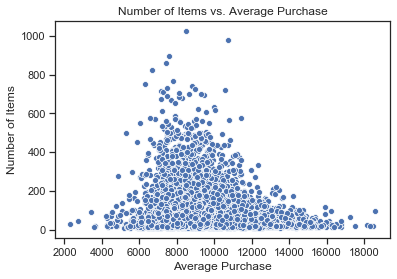

In [28]:
#make scatter plot to visuals num items v avg purchases

user_avg_purchase_item = sns.scatterplot(userID['Average Purchase'], userID['Number of Items'])
user_avg_purchase_item.set_title('Number of Items vs. Average Purchase')


In [29]:
#Now try k-mean clusters
#using elbow method first to find optimal number of clusters 
#wcss is the within cluster sum of squares
#first slelect the features for clustering
#first preprocess your data 

train_scaled = preprocessing.scale(userID)
train_scaled







array([[-0.01234208, -0.54463316],
       [ 0.50624741, -0.15277248],
       [ 1.17024504, -0.60061326],
       ...,
       [-1.09316758, -0.75922353],
       [-0.84212586, -0.18076253],
       [-0.20310072,  0.80821918]])

In [30]:
#now find optimal number of clusters for kmean clusters
wcss=[]

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(train_scaled)
    wcss.append(kmeans.inertia_)

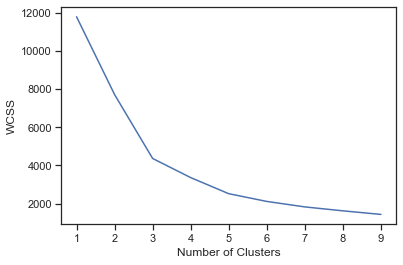

In [31]:
sns.lineplot(range(1,10),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
#Optimal number o fclusters is 3. Notice the giant kink in the chart this is the elbow
kmeans = KMeans(3)


In [33]:
kmeans.fit(userID)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [34]:
identify_clusters = userID.copy()
identify_clusters['Clusters'] = kmeans.fit_predict(train_scaled)

In [35]:
identify_clusters

,Average Purchase,Number of Items,Clusters
User_ID,,,
1000001,9545.514286,35,2
1000002,10525.610390,77,1
1000003,11780.517241,29,1
1000004,14747.714286,14,1
1000005,7745.292453,106,2
...,...,...,...
1006036,8007.894942,514,0
1006037,9176.540984,122,2
1006038,7502.833333,12,2


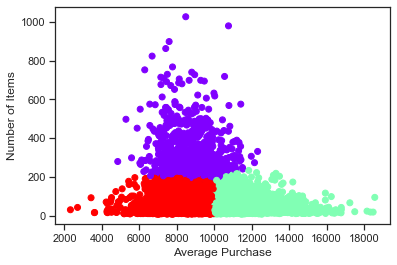

In [36]:
#visualize the kmean clusters (must learn how to correctly plot this wiht seaborn)
plt.scatter(identify_clusters['Average Purchase'], identify_clusters['Number of Items'], c= identify_clusters['Clusters'], cmap="rainbow")
plt.xlabel('Average Purchase')
plt.ylabel('Number of Items')
plt.show()


In [37]:
#there are 3 total clusters. How can you identify what color is what cluster?
#red color is small number of items wiht small average purchase
#purple is large number of items with medium average purchase
#green is small number of purchase with high average purchase
#display the kmean clusters summary using values_counts method
identify_clusters['Clusters'].value_counts()

2    3055
1    2089
0     747
Name: Clusters, dtype: int64

In [38]:
#Now we want to proceed with linear regression of data and try to answer the original question
#original question: how much will a customer spend on Black friday?
#in order to further analyze data we must change/convert the categorical data (sex, city, age) into numerical values for statistical analysis
#also must remove all NA values and replace with 0
lineartrain = traindf.copy()
lineartrain['Product_Category_3'] =lineartrain['Product_Category_3'].fillna(0)
lineartrain['Product_Category_2'] = lineartrain['Product_Category_2'].fillna(0)
lineartrain["Product_Category_1"] = lineartrain['Product_Category_1'].fillna(0)
lineartrain['City_Category'] = lineartrain['City_Category'].map({'A':0,"B":1,'C':2})
lineartrain['Gender'] = lineartrain['Gender'].map({'F':0,'M':1})
lineartrain['Age'] = lineartrain['Age'].map({'0-17':0,'18-25':1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6})
lineartrain['Stay_In_Current_City_Years'] = lineartrain['Stay_In_Current_City_Years'].map({'0':0, '1':1, '2':2, '3':3, '4+':4})
lineartrain.drop(['User_ID', 'Product_ID'], inplace=True, axis=1)
lineartrain

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,0.0,0.0,8370
1,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,0,10,0,2,0,12,0.0,0.0,1422
3,0,0,10,0,2,0,12,14.0,0.0,1057
4,1,6,16,2,4,0,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,1,20,0.0,0.0,368
550064,0,2,1,2,3,0,20,0.0,0.0,371
550065,0,2,15,1,4,1,20,0.0,0.0,137
550066,0,6,1,2,2,0,20,0.0,0.0,365


In [39]:
#We can use a correlation matrix to establish Pearson Correlation coefficient between the available vairbale
#Note that the correlation matrix is symmetrical accross the diaginals line of 1's. Remember that the correlation between a vairbale and itself is always 1
#the Pearson correlation coefficient is a measure of how well two variables are related. It basically tells you if wheather you can draw a line graph to represent the data
#remember that the Pearson correlation coefficient cannot distinguish between dependant and independant variables
lineartrain.corr(method="pearson")

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Gender,1.000000,-0.004262,0.117291,-0.004515,0.014660,-0.011603,-0.045594,-0.000954,0.036146,0.060346
Age,-0.004262,1.000000,0.091463,0.123079,-0.004712,0.311738,0.061197,0.018770,-0.007422,0.015839
Occupation,0.117291,0.091463,1.000000,0.034479,0.030005,0.024280,-0.007618,0.006712,0.012269,0.020833
City_Category,-0.004515,0.123079,0.034479,1.000000,0.019946,0.039790,-0.014364,0.016003,0.035525,0.061914
Stay_In_Current_City_Years,0.014660,-0.004712,0.030005,0.019946,1.000000,-0.012819,-0.004213,0.001262,0.001977,0.005422
Marital_Status,-0.011603,0.311738,0.024280,0.039790,-0.012819,1.000000,0.019888,0.001099,-0.004629,-0.000463
Product_Category_1,-0.045594,0.061197,-0.007618,-0.014364,-0.004213,0.019888,1.000000,-0.067877,-0.385534,-0.343703
Product_Category_2,-0.000954,0.018770,0.006712,0.016003,0.001262,0.001099,-0.067877,1.000000,0.094750,0.052288
Product_Category_3,0.036146,-0.007422,0.012269,0.035525,0.001977,-0.004629,-0.385534,0.094750,1.000000,0.288501
Purchase,0.060346,0.015839,0.020833,0.061914,0.005422,-0.000463,-0.343703,0.052288,0.288501,1.000000


In [40]:
#now that we have the correlation matrix we can look specifically at the relationship between Purchase/Average Purchase to all the other variables
lineartrain[lineartrain.columns[0:]].corr()['Purchase'].sort_values(ascending=False)

Purchase                      1.000000
Product_Category_3            0.288501
City_Category                 0.061914
Gender                        0.060346
Product_Category_2            0.052288
Occupation                    0.020833
Age                           0.015839
Stay_In_Current_City_Years    0.005422
Marital_Status               -0.000463
Product_Category_1           -0.343703
Name: Purchase, dtype: float64

In [41]:
#see what other variables have strong correlation
#what correlates with age?
lineartrain[lineartrain.columns[0:]].corr()['Age'].sort_values(ascending=False)

Age                           1.000000
Marital_Status                0.311738
City_Category                 0.123079
Occupation                    0.091463
Product_Category_1            0.061197
Product_Category_2            0.018770
Purchase                      0.015839
Gender                       -0.004262
Stay_In_Current_City_Years   -0.004712
Product_Category_3           -0.007422
Name: Age, dtype: float64

In [42]:
#What correlates with occupation?
lineartrain[lineartrain.columns[0:]].corr()['Occupation'].sort_values(ascending=False)

Occupation                    1.000000
Gender                        0.117291
Age                           0.091463
City_Category                 0.034479
Stay_In_Current_City_Years    0.030005
Marital_Status                0.024280
Purchase                      0.020833
Product_Category_3            0.012269
Product_Category_2            0.006712
Product_Category_1           -0.007618
Name: Occupation, dtype: float64

In [43]:
#now we can produce the output neccasry to answer Original Question
#originnal qestion is how much will customers buy on black friday?
#going to use the statsmodels package to produce R^2 values, mean squared and root mean squared errors for the data
y = lineartrain['Purchase']
x1 = lineartrain[['Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Age', 'Gender', 'Occupation', 'Stay_In_Current_City_Years','City_Category']]

In [44]:
#Here we are using Ordinary Least Squares analysis (OLS)
x = sm.add_constant(x1)
result = sm.OLS(y,x).fit()
result.summary()

c:\users\kwaz9\appdata\local\programs\python\python38\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                 1.234e+04
Date:                Sat, 07 Dec 2019   Prob (F-statistic):               0.00
Time:                        11:49:20   Log-Likelihood:            -5.4227e+06
No. Observations:              550068   AIC:                         1.085e+07
Df Residuals:                  550059   BIC:                         1.085e+07
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       9505.1905     24.724    384.452      0.000    9456.732    9553.649
Product_Category_1          -348.0746      1.723   -202.056      0.000    -351.451    -344.698
Product_Category_2            12.5601      1.009     12.451      0.000      10.583      14.537
Product_Category_3           143.6789      1.085    132.406      0.000     141.552     145.806
Age                          100.8194      4.672     21.580      0.000      91.663     109.976
Gender                       476.2780     14.583     32.660      0.000     447.696     504.860
Occupation                     5.7420      0.968      5.934      0.000       3.845       7.638
Stay_In_Current_City_Years     8.7602      4.840      1.810      0.070      -0.726      18.246
City_Category                316.7259      8.276     38.268      0.000     300.504     332.948
==============================================================================
Omnibus:                    57260.904   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79651.005
Skew:                           0.833   Prob(JB):                         0.00
Kurtosis:                       3.836   Cond. No.                         58.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
#Here we have the Linear Regression prediciton
x

,const,Product_Category_1,Product_Category_2,Product_Category_3,Age,Gender,Occupation,Stay_In_Current_City_Years,City_Category
0,1.0,3,0.0,0.0,0,0,10,2,0
1,1.0,1,6.0,14.0,0,0,10,2,0
2,1.0,12,0.0,0.0,0,0,10,2,0
3,1.0,12,14.0,0.0,0,0,10,2,0
4,1.0,8,0.0,0.0,6,1,16,4,2
...,...,...,...,...,...,...,...,...,...
550063,1.0,20,0.0,0.0,5,1,13,1,1
550064,1.0,20,0.0,0.0,2,0,1,3,2
550065,1.0,20,0.0,0.0,2,0,15,4,1
550066,1.0,20,0.0,0.0,6,0,1,2,2


In [47]:
#find the root mean squared error 
x_array = np.asanyarray(x)
x_array.shape


(550068, 9)

In [48]:
#there is a shape mismatch between the x_array and y

y.shape

(550068,)

In [51]:
#we must reshape y with the numpy reshape method  to 1
#make sure y is an np array
y_array = np.asanyarray(y)
y_array = y_array.reshape(y.size, 1)
y_array

array([[ 8370],
       [15200],
       [ 1422],
       ...,
       [  137],
       [  365],
       [  490]], dtype=int64)

In [53]:
rmse = sm.tools.eval_measures.rmse(y_array, x_array)
rmse

array([10537.25436054, 10534.02878269, 10532.05970959, 10533.89816183,
       10535.92878609, 10537.45900356, 10530.9711968 , 10536.4965064 ,
       10537.19446724])